In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [5]:
df = pd.read_csv("data/stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
# check null value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
# create x and y
X = df.drop("math_score", axis=1)
y = df['math_score']

y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
numerical_feature = X.select_dtypes(exclude="object").columns
categorical_feature = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
one_hot = OneHotEncoder()

perprocessor = ColumnTransformer([
    ("OneHotEncoder",  one_hot, categorical_feature),
    ("StandaredScaler", scaler, numerical_feature)
])


In [14]:
# split dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [17]:
X_train = perprocessor.fit_transform(X_train)

In [19]:
X_test = perprocessor.transform(X_test)

##### Create an Evaluate Function to give all metrics after model Training

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, mse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():

    
    # train the model
    model.fit(X_train, y_train)

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate score for training set
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # evaluate score for test set
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # keep model name and score 
    model_list.append(name)



    print(f'{model} Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Square error {:.4f} ".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print(f'{model} Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("Mean Square error {:.4f} ".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')

     


LinearRegression() Model performance for Training set
- Root Mean Squared Error: 28.3349
Mean Square error 5.3231 
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
LinearRegression() Model performance for Test set
- Root Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
Mean Square error 5.3940 
- R2 Score: 0.8804


DecisionTreeRegressor() Model performance for Training set
- Root Mean Squared Error: 0.0781
Mean Square error 0.2795 
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
DecisionTreeRegressor() Model performance for Test set
- Root Mean Squared Error: 63.4300
- Mean Absolute Error: 6.3300
Mean Square error 7.9643 
- R2 Score: 0.7393


RandomForestRegressor() Model performance for Training set
- Root Mean Squared Error: 5.1192
Mean Square error 2.2626 
- Mean Absolute Error: 1.8024
- R2 Score: 0.9773
----------------------------------
RandomForestRegressor() Model performance for Test set
- Root Mean

In [51]:
model_compare = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Scoer']).sort_values(by=['R2_Scoer'], ascending=True)
model_compare

,Model Name,R2_Scoer
1,Decision Tree,0.739334
3,XGBRegressor,0.827797
4,CatBoosting Regressor,0.851831
5,AdaBoost Regressor,0.854456
2,Random Forest Regressor,0.854771
0,Linear Regression,0.880433


<Axes: xlabel='Model Name', ylabel='R2_Scoer'>

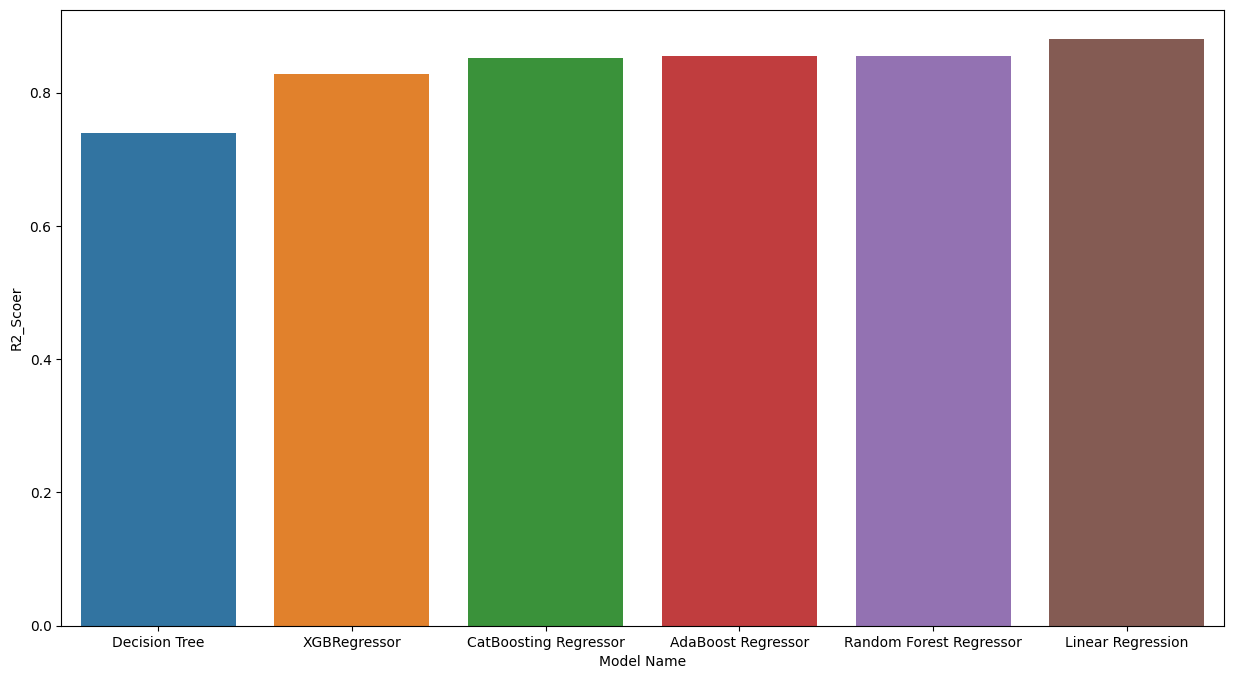

In [53]:
# Create plot for prediction
plt.figure(figsize=(15, 8))
sns.barplot(data=model_compare, x='Model Name', y="R2_Scoer", hue="Model Name")